IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


LOADING DATA

In [2]:
# Load the dataset
df = pd.read_csv(r"D:\Internships\Prodigy Infotech\KNN\archive\Mall_Customers.csv")

# Display the first few rows of the dataframe
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Data Preprocessing

In [3]:
# Check for missing values
print(df.isnull().sum())

# Drop missing values if any (or handle them appropriately)
df.dropna(inplace=True)

# Standardize the data (especially important if features have different units or scales)
scaler = StandardScaler()
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Feature Selection

In [4]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


 Determine Optimal Number of Clusters

c:\Users\conta\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\conta\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\conta\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\conta\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\conta\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

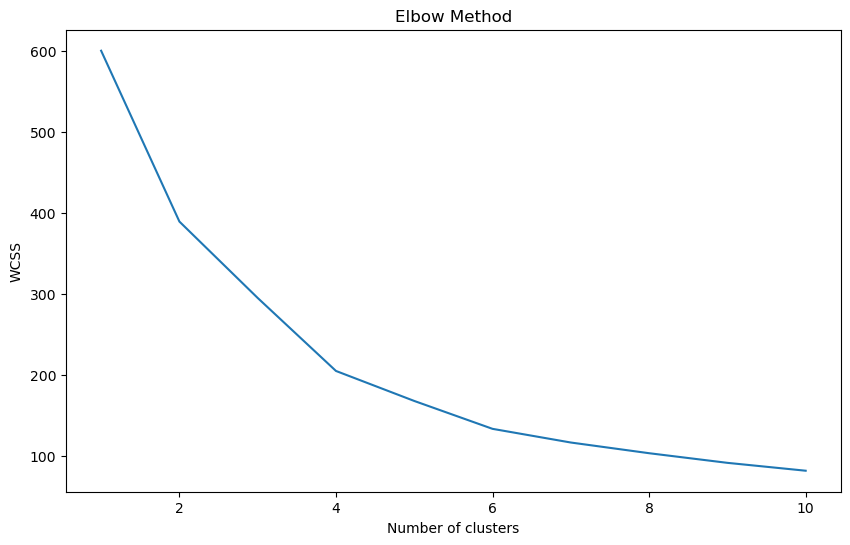

In [5]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph with some fun colors
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='purple')
plt.title('Elbow Method', fontsize=18, color='darkblue', fontweight='bold')
plt.xlabel('Number of Clusters', fontsize=14, color='darkgreen')
plt.ylabel('WCSS', fontsize=14, color='darkgreen')
plt.xticks(fontsize=12, color='gray')
plt.yticks(fontsize=12, color='gray')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Silhouette Score

c:\Users\conta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\conta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\conta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\conta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

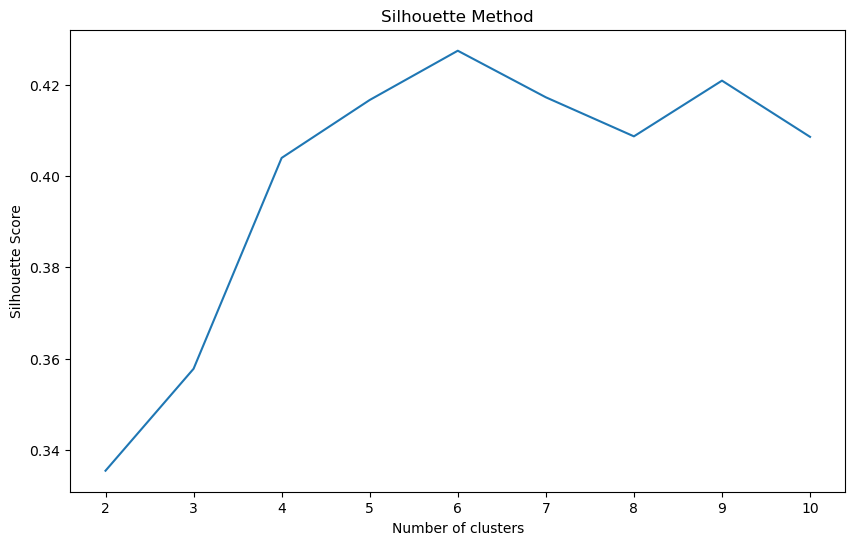

In [6]:
# Silhouette Method
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting silhouette scores with vibrant colors
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='orange')
plt.title('Silhouette Method', fontsize=18, color='darkblue', fontweight='bold')
plt.xlabel('Number of Clusters', fontsize=14, color='darkgreen')
plt.ylabel('Silhouette Score', fontsize=14, color='darkgreen')
plt.xticks(fontsize=12, color='gray')
plt.yticks(fontsize=12, color='gray')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Apply K-means Clustering

In [7]:
# Applying k-means to the dataset
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Adding cluster data to the original dataframe
df['Cluster'] = y_kmeans


c:\Users\conta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Visualize Clusters

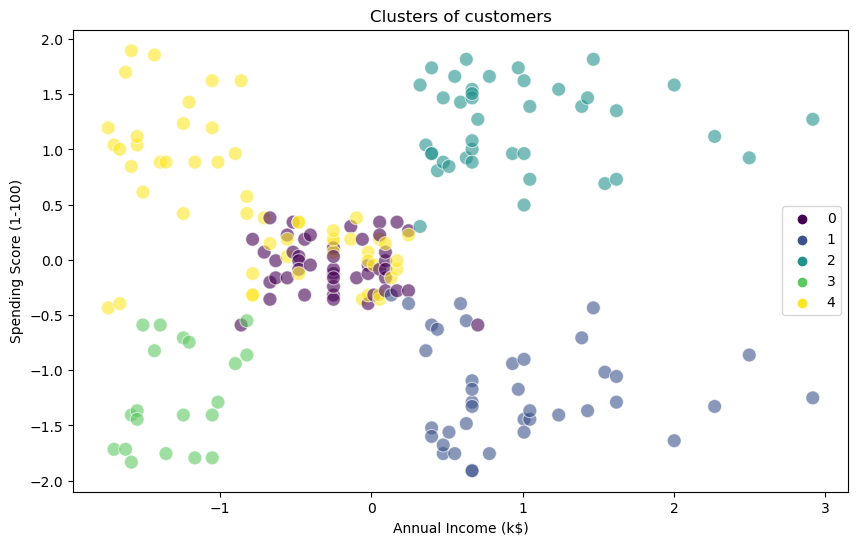

In [8]:
# Visualizing the clusters with lively colors and markers
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='rainbow', data=df, s=100, alpha=0.8)
plt.title('Clusters of Customers', fontsize=18, color='darkblue', fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize=14, color='darkgreen')
plt.ylabel('Spending Score (1-100)', fontsize=14, color='darkgreen')
plt.xticks(fontsize=12, color='gray')
plt.yticks(fontsize=12, color='gray')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


3D Visualization

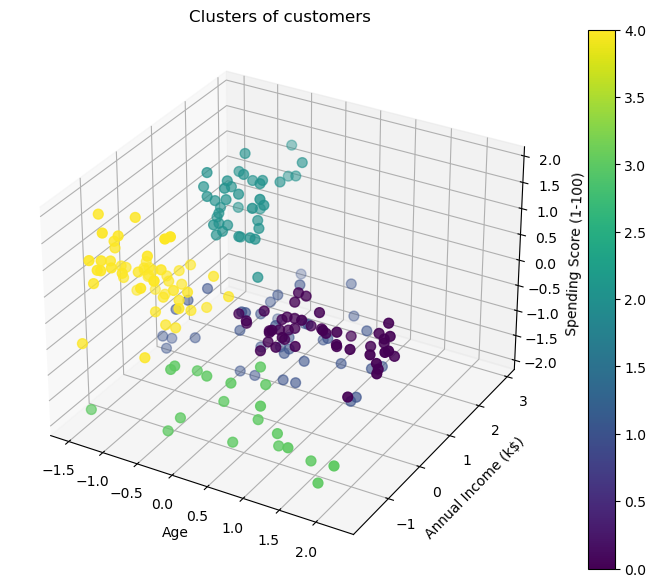

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], s=50, cmap='rainbow')
plt.colorbar(sc)
ax.set_title('Clusters of Customers', fontsize=18, color='darkblue', fontweight='bold')
ax.set_xlabel('Age', fontsize=14, color='darkgreen')
ax.set_ylabel('Annual Income (k$)', fontsize=14, color='darkgreen')
ax.set_zlabel('Spending Score (1-100)', fontsize=14, color='darkgreen')
ax.tick_params(axis='x', labelsize=12, colors='gray')
ax.tick_params(axis='y', labelsize=12, colors='gray')
ax.tick_params(axis='z', labelsize=12, colors='gray')
plt.tight_layout()
plt.show()
